In [16]:
import csv
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from collections import defaultdict
import random
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm
#for similarity metrices in the similarity class
from math import sqrt 
from scipy import spatial
from scipy.spatial import distance #to compute the euclidean similarity
from scipy.spatial import distance_matrix
from scipy import stats  #for pearson but code didnot work
import matplotlib.pyplot as plt

In [17]:
#supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [18]:
class Data:
    def load_files_and_clean(self):
        books_df = pd.read_csv("Books.csv" , sep = ";",error_bad_lines=False,usecols=['ISBN','Book-Title'])  # to get the data in Books dataset
        users = pd.read_csv("Users.csv" , sep = ";",usecols = ['User-ID']) #to get the required columns from users data
        book_ratings_df = pd.read_csv("Book-Ratings.csv" , sep = ";",na_values= [" "])  #index_col = 0  # to get the book-ratings file 
        #try merging books and ratings
        rating_books = pd.merge(book_ratings_df, books_df, on="ISBN")
        rating_books =  rating_books.astype({"Book-Rating": int}) #changing the datatype of rating column to Int
        rating_books = rating_books.loc[rating_books['Book-Rating'] > 0] #ignoring users who has given 0 rating to the books
        rating_books.reset_index(inplace=True) 
        rating_books.columns = ["index","userid","isbn","rating","title"]
        return rating_books #returns final dataset

In [19]:
#to implement the similarity metrices in first assignment using class and implement the methods by iterating over the dataframe
class similarity:
    
    #to implement chebyshev to find similarity between two users
    def chebyshev(self,df, user1, user2):
        s1=[]
        s2=[]
    #overall = 0
    
        for x in df.loc[df.userid == user1, 'isbn'].to_numpy():
            
            if x in df.loc[df.userid == user2, 'isbn'].to_numpy():
                s =df.loc[(df.userid ==user1) & (df.isbn==x), 'rating'].iloc[0]
                p =df.loc[(df.userid ==user2) & (df.isbn==x), 'rating'].iloc[0]
            #print(p)
                s1.insert(len(s1),s)
                s2.insert(len(s2),p)
            #for euclidean
                a = np.array(s1)  #for calculating euclidean
                b = np.array(s2)  #for calculating euclidean
                cheby = distance.chebyshev(s1,s2) #using scipy.spatial.distance.chebyshev we are trying to calculate the metrices
        return round(cheby) 
    
    #implementing pearson similarity metrice 
    def pearsoncoefficient(self,df,user1, user2):
        
        s1 = []
        s2 = []
        num = 0
    #n = len(x)
        for x in df.loc[df.userid == user1, 'isbn'].to_numpy():
            
            if x in df.loc[df.userid == user2, 'isbn'].to_numpy():
                
                n = len(x)
                s =df.loc[(df.userid==user1) & (df.isbn==x), 'rating'].iloc[0]
                p =df.loc[(df.userid==user2) & (df.isbn==x), 'rating'].iloc[0]
                #print(p)
                s1.insert(len(s1),s)
                s2.insert(len(s2),p)
                sum_x1 = float(sum(s1))
                sum_y1 = float(sum(s2))
                sum_x1_sq = sum(xi*xi for xi in s1)
                sum_y1_sq = sum(yi*yi for yi in s2)
                psum = sum(xi*yi for xi, yi in zip(s1, s2))
                num = psum - (sum_x1 * sum_y1/n)
                den = pow((sum_x1_sq - pow(sum_x1, 2) / n) * (sum_y1_sq - pow(sum_y1, 2) / n), 0.5)
                if den == 0:
                    return 0
                else:
                #den = pow((sum_x1_sq - pow(sum_x1, 2) / n) * (sum_y1_sq - pow(sum_y1, 2) / n), 0.5)
                    return num / den 
    
    #implementing euclidean metrice
    def euclidean(self,df, user1, user2):
        s1=[]
        s2=[]
        #overall = 0
    
        for x in df.loc[df.userid == user1, 'isbn'].to_numpy():
            if x in df.loc[df.userid == user2, 'isbn'].to_numpy():         
                s =df.loc[(df.userid==user1) & (df.isbn==x), 'rating'].iloc[0]
                p =df.loc[(df.userid==user2) & (df.isbn==x), 'rating'].iloc[0]
                s1.insert(len(s1),s)
                s2.insert(len(s2),p)
                #for euclidean
                a = np.array(s1)  #for calculating euclidean
                b = np.array(s2)  #for calculating euclidean
                dst = distance.euclidean(a, b) #calculating euclidean dist using scipy.spatial import distance 
        return round(dst,2)
    
    #implementing cosine metric
    def cosine(self,df, user1, user2):
        s1=[]
        s2=[]
        #overall = 0
    
        for x in df.loc[df.userid == user1, 'isbn'].to_numpy():
            if x in df.loc[df.userid == user2, 'isbn'].to_numpy():     
                s =df.loc[(df.userid==user1) & (df.isbn==x), 'rating'].iloc[0]
                p =df.loc[(df.userid==user2) & (df.isbn==x), 'rating'].iloc[0]
            #print(p)
                s1.insert(len(s1),s)
                s2.insert(len(s2),p)
                cosine_1 = 1 - spatial.distance.cosine(s1, s2)  #for executing cosine similarity using numpy
    
        return cosine_1
    
    #implementing minkowski metrice
    def minkowski(self,df, user1, user2):
        s1=[]
        s2=[]
        #overall = 0
        pvalue = float(input('please enter the pvalue of the minkowski : '))
    
        for x in df.loc[df.userid == user1, 'isbn'].to_numpy():           
            if x in df.loc[df.userid == user2, 'isbn'].to_numpy():              
                s =df.loc[(df.userid==user1) & (df.isbn==x), 'rating'].iloc[0]
                p =df.loc[(df.userid==user2) & (df.isbn==x), 'rating'].iloc[0]
                #print(p)
                s1.insert(len(s1),s)
                s2.insert(len(s2),p)
    
        return 1/(sum(pow(abs(c-b), pvalue) for c, b in zip(s1, s2))**1/pvalue)
    
    #implementing manhattan metrice
    def manhattan(self,df, user1, user2):
        s1=[]
        s2=[]
    #overall = 0
    
        for x in df.loc[df.userid == user1, 'isbn'].to_numpy():         
            if x in df.loc[df.userid == user2, 'isbn'].to_numpy():
                s =df.loc[(df.userid==user1) & (df.isbn==x), 'rating'].iloc[0]
                p =df.loc[(df.userid==user2) & (df.isbn==x), 'rating'].iloc[0]
                #print(p)
                s1.insert(len(s1),s)
                s2.insert(len(s2),p)
    
        return sum(abs(a-b) for a,b in zip(s1,s2))  
    
    #code to find n similar users but it did not work within the class so implemented the code in knn to find users with similar taste
    def similar_users_p(self,df, user, no_of_users, matrix='pearsoncoefficient'):
        userids = df.userid.unique().tolist()
        score = [(pearsoncoefficient(self,df, user1, user2), user2) for user2 in userids if user2!=user]
        #score.sort()
        #score.reverse()
        return score[0:no_of_users]
    

In [20]:
class Book_reccomender:
    def __init__(self, training_data, metric = "cosine", neighbours = 7, no_of_train_samples = 0.01, no_of_test_samples = 50):
        self.training_data = training_data
        self.metric = metric
        self.neighbours = neighbours
        self.no_of_train_samples = no_of_train_samples
        if no_of_test_samples == -1:
            self.no_of_test_samples = len(training_data)
        else:
            self.no_of_test_samples = no_of_test_samples
        self.no_of_test_samples = no_of_test_samples
        self.__create_sample()
        self.__pivot_training_data()
        self.__model_fit()
        self.__x = []
        self.__y = []
        
    #prepare the sample data   
    def __create_sample(self):
        self.training_data = self.training_data.sample(frac=self.no_of_train_samples, random_state=1)
        
    #create a pivot table and fill Nan with 0 using fillna function    
    def __pivot_training_data(self):
        self.__pivot_data = self.training_data.pivot_table(index='title', columns='userid', values='rating').fillna(0)
    
    #fit the model using k nearest neighbours algorithm in skilearn package
    def __model_fit(self):
        model_nn = NearestNeighbors(metric=self.metric, algorithm='brute', n_neighbors=self.neighbours, n_jobs=-1)
        model_nn.fit(self.__pivot_data)
        self.__model = model_nn
    
    def __generate_user_book_dict(self):
        user_books = defaultdict(list)
        for i in self.training_data.index:
            user_books[self.training_data['userid'][i]].append(self.training_data['title'][i])
        return user_books
    
    def __generate_testing_data(self):
        if self.no_of_test_samples == -1:
            user_books_test = {k: self.__user_books[k] for k in list(self.__user_books)}
        else:
            user_books_test = {k: self.__user_books[k] for k in list(self.__user_books)[:self.no_of_test_samples]}
        return user_books_test
    
    #identifying users with same taste as the random user
    def get_users_with_same_taste(self):
        same_book_rating = defaultdict(list)
        for i in self.training_data.index:
            same_book_rating[self.training_data['isbn'][i] + str(self.training_data['rating'][i])].append(self.training_data["userid"][i])
        return [i for i in list(same_book_rating.values()) if len(i)>1]
    
    #below method recommends books to the random user we obtained
    def book_recommendation(self, user_id):
        try:
            book_name = self.__pivot_data[user_id]
            book_names = book_name[book_name != 0].index.tolist()
        except KeyError:
            book_names = []
            
        reccomended_books = []  #creating empty list
        for book_name in book_names:
            indices= self.__model.kneighbors(self.__pivot_data.loc[[book_name]], 10, return_distance=False)
            for value in self.__pivot_data.index[indices][0]:
                if value not in reccomended_books:
                    reccomended_books.append(value)
        return reccomended_books
    
    def __test(self):
        self.__user_books = self.__generate_user_book_dict()
        self.__user_books_test = self.__generate_testing_data()
        x = []
        y = []
        for user_id, books in tqdm(self.__user_books_test.items()):
            try:
                book_name = self.__pivot_data[user_id]
                book_names = book_name[book_name != 0].index.tolist()
                book_name = random.choice(book_names)
            except KeyError:
                book_name = ''
            reccomended_books = []
            indices= self.__model.kneighbors(self.__pivot_data.loc[[book_name]], 10, return_distance=False)
            for value in self.__pivot_data.index[indices][0]:
                if value not in reccomended_books:
                    reccomended_books.append(value)
            c = 0
            for i in reccomended_books:
                if i in books:
                    c += 1
            if c > 2:
                x.append(1)
                y.append(1)
            else:
                x.append(1)
                y.append(0)

        self.__x = x
        self.__y = y
    
    #below code is used to generate plot 
    def generate_plot(self):
        if len(self.__x) < 1:
            self.__test()
        training_examples = []
        accuracy = []
        for i in range(len(self.__x)):
            training_examples.append(i)
            accuracy.append(accuracy_score(self.__x[:i], self.__y[:i]))
        plt.plot(training_examples, accuracy)
        plt.xlabel("No. of Training Examples")
        plt.ylabel("Accuracy")
        plt.title("Training Examples vs Accuracy")
        return plt.show()
    
    #method to get all userids in the pivot table
    def get_all_user_ids(self):
        return list(self.__pivot_data.columns)
    
    #using below method we are getting a random user ,to whom we find the nearest neighbors and recommend books implement similarity metrices and find accuracy
    def get_random_user_id(self):
        return random.choice(self.get_all_user_ids())
    
    #to compute the accuracy
    def get_accuracy(self):
        if len(self.__x) < 1:
            self.__test()
        return accuracy_score(self.__x, self.__y)

  2%|█▋                                                                                 | 1/50 [00:00<00:06,  7.35it/s]

the random user is  39353
The users with the same taste as the randomuser [[239594, 224809], [27401, 105517], [182085, 172030], [15661, 232066], [250131, 95250], [241749, 82841], [109837, 177458], [38718, 218724, 250368], [37227, 101744], [234165, 236461], [257971, 117384], [14456, 38273], [25216, 262469], [133284, 53605], [261214, 27286], [251843, 243294], [93377, 168296], [173415, 126492], [262541, 224533], [52521, 120396], [86202, 117577], [137688, 763], [179978, 254859, 182847], [234359, 232067], [183566, 26618], [105221, 276463], [158254, 203240], [56554, 111468], [224360, 251019], [224226, 160571], [42408, 177233], [184904, 67402], [145286, 15057], [26048, 179843], [222035, 81927], [27996, 233154], [101081, 86033], [87141, 67840], [114983, 232343], [261808, 208019], [21014, 70589], [113334, 11400], [244204, 81311], [184424, 6251], [213202, 112001], [161681, 24433], [22607, 26196], [220370, 193448], [127581, 23666], [77516, 193940], [278137, 92524], [201768, 275673], [192492, 2157

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  9.72it/s]


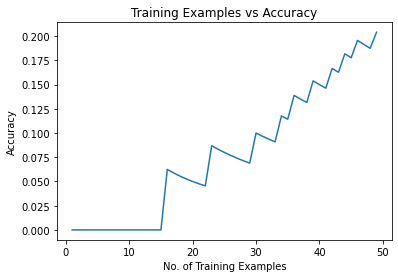

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.22it/s]


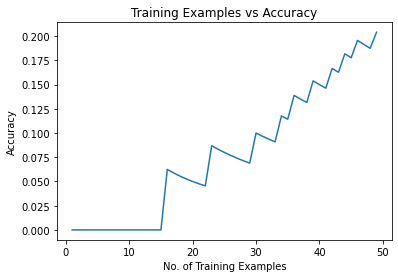

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.25it/s]


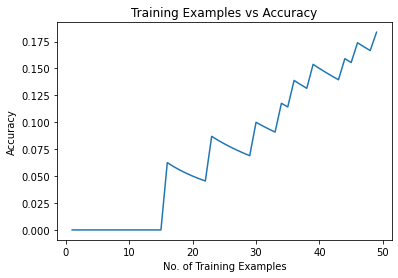

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 12.86it/s]


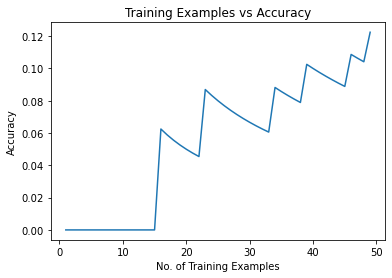

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.59it/s]


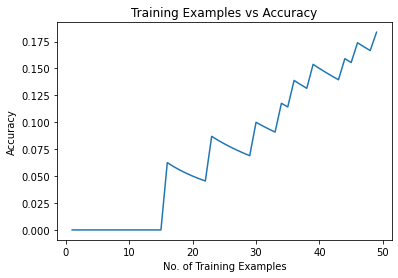

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  8.68it/s]


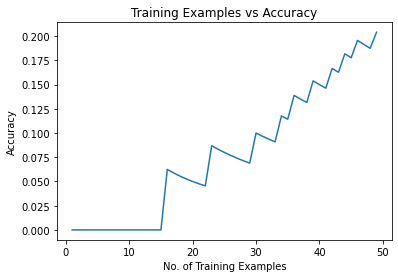

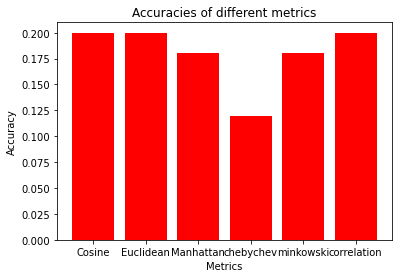

In [34]:
if __name__ == '__main__': #global function
    Load_data = Data() # creating an object using the constructor of the class Data,instance of the class Data has been created
    similarity_class = similarity() #An instance of the Similarity class has been created
    
    rating_books = Load_data.load_files_and_clean() #calling the method within the data class using object
    #book reccomender needs as in put rating and books merged file
    book_reccomender_class_object = Book_reccomender(rating_books) #an instance of the book_reccomender class has been created


    #book reccomender class has optional parameters like metric
    #we can pass any metric that sklearn's NearestNeighbour class can accept like "cosine", "euclidean", "manhattan" etc
    #metric is by default set to "cosine"
    book_reccomender_class_object = Book_reccomender(rating_books, metric = "cosine")


    #we can also pass optional argument neighbours which sets the no of neighbours to use in knn algorithm
    #neighbours is by default set to 7
    book_reccomender_class_object = Book_reccomender(rating_books, metric = "cosine", neighbours = 7)

    #we can also pass optional argument no_of_train_samples which sets the percentage of the dataset to select for training
    #setting no_of_train_samples to 0.1 means use 10% of data for training
    #set no_of_train_samples to 1.0 to use full dataset(using full dataset takes a lot of time and memory
    #default no_of_train_samples is set to 0.01 which is 1% of data
    book_reccomender_class_object = Book_reccomender(rating_books, metric = "cosine", neighbours = 7, no_of_train_samples = 0.01)

    #we can also pass optional argument no_of_test_samples which sets the no of data points to train
    #setting no_of_test_samples to -1 uses whole training set
    #default no_of_test_samples is set to 50 data to train
    #setting high value of no_of_test_samples takes more time to get accuracy or generate_plot but can get better accuracy
    book_reccomender_class_object = Book_reccomender(rating_books, metric = "cosine", neighbours = 7, no_of_train_samples = 0.01, no_of_test_samples = 50)
    
    #implementing the object to find the users with same taste ,find the accuracy and plot it using metrices.
    #creating an instance of the book_reccomender class using class constructor for all the six metrices.
    
    cosine_metric = Book_reccomender(rating_books, metric = "cosine",neighbours = 7, no_of_train_samples = 0.01, no_of_test_samples = 50)
    euclidean_metric = Book_reccomender(rating_books, metric = "euclidean",neighbours = 7, no_of_train_samples = 0.01, no_of_test_samples = 50)
    manhattan_metric = Book_reccomender(rating_books, metric = "manhattan",neighbours = 7, no_of_train_samples = 0.01, no_of_test_samples = 50)
    chebyshev_metric = Book_reccomender(rating_books, metric = "chebyshev", no_of_train_samples = 0.01, no_of_test_samples = 50)
    min_metric = Book_reccomender(rating_books, metric = "minkowski",no_of_train_samples = 0.01, no_of_test_samples = 50)
    corr_metric = Book_reccomender(rating_books, metric = "correlation",no_of_train_samples = 0.01, no_of_test_samples = 50)

    #getting a random user and storing it in random_user_id_cosine
    random_user_id_cosine = cosine_metric.get_random_user_id()
    #cosine_metric.predict(random_user_id_cosine)
    #finding users who have same taste as the random_user_id_cosine
    users_with_same_taste = cosine_metric.get_users_with_same_taste()
    #recommending the books to the random user using the book_recommendation() function
    recommend = cosine_metric.book_recommendation(random_user_id_cosine)
    
    #displays the random userid we got via the get_random_user_id method
    print("The random user is ", random_user_id_cosine )
    
    #TO print the users having same taste as the random user
    print("The users with the same taste as the random user",users_with_same_taste)
    
    #To recommend books to the random user
    print("Recommending books to the user ", recommend)
    #print("users having same taste",users_with_same_taste)
    
    #to generate the plot to the six metrices 
    cosine_metric.generate_plot()
    euclidean_metric.generate_plot()
    manhattan_metric.generate_plot()
    chebyshev_metric.generate_plot()
    min_metric.generate_plot()
    corr_metric.generate_plot()
    
    #to find the accuracy of the metrices
    cosine_metric.get_accuracy()
    euclidean_metric.get_accuracy()
    manhattan_metric.get_accuracy()
    chebyshev_metric.get_accuracy()
    min_metric.get_accuracy()
    corr_metric.get_accuracy()
    
    #implementing the bar graph to compare the accuracy of the metrices and evaluate
    bar_graph_data = {"Cosine": cosine_metric.get_accuracy(),
                  "Euclidean": euclidean_metric.get_accuracy(),
                  "Manhattan":manhattan_metric.get_accuracy(),
                  "chebychev":chebyshev_metric.get_accuracy(),
                  "minkowski":min_metric.get_accuracy(),
                  "correlation":corr_metric.get_accuracy()
                 }
    metrics = bar_graph_data.keys()
    accuracies = bar_graph_data.values()
    
    #using the plt function of matplotlib.pyplot
    
    plt.bar(metrics, accuracies, color ='red')
    plt.xlabel("Metrics")
    plt.ylabel("Accuracy")
    plt.title("Accuracies of different metrics")
    plt.show()
   